# Getting Genres from Spotify using Spotipy

In [4]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I found top 100 for 2017 csv on kaggle
top100_17 = pd.read_csv('top100_2017.csv')

# result = sp.search('Thriller',type='track')
# pprint.pprint(result)

top100_17.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [5]:
songs = []
genres = []



for song in range(0,len(top100_17['id'])):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(top100_17['name'][song] + ' ' + top100_17['artists'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

In [6]:

top100_17['genres'] = genres
top100_17.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,n/a
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,n/a
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,n/a
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,"[edm, electropop, pop, tropical house]"
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,"[dance pop, hip hop, pop, pop rap, r&b, rap, s..."


In [9]:
allGenres = []
for gen in top100_17['genres']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)

377

In [10]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
setOfGenres = set(allGenres)
setOfGenres

listOfGenres = list(setOfGenres)
first = listOfGenres[0]
genreDist[first]

1

In [24]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genre_count = df.rename_axis('Genre').reset_index().rename(columns={0:'Count'})

In [27]:

genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Genre,Count
2,pop,76
4,dance pop,43
13,post-teen pop,30
8,rap,24
0,edm,22


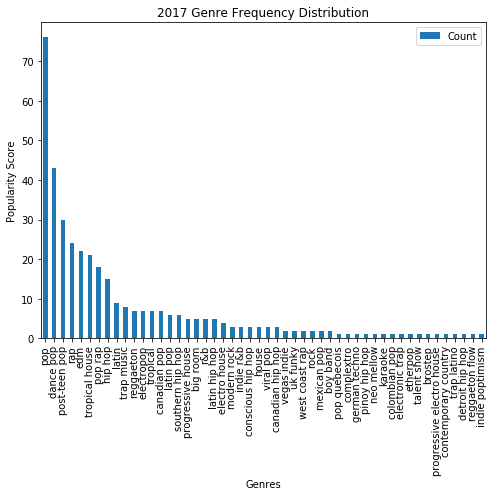

In [37]:
genre_count = genre_count.set_index('Genre')
`

In [15]:
genreDist['pinoy hip hop']

1

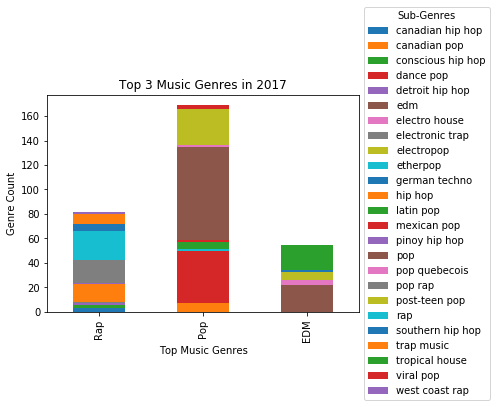

In [21]:
data = pd.DataFrame([
        ('Pop','pop', genreDist['pop']),
        ('Pop','dance pop', genreDist['dance pop']),
        ('Pop','post-teen pop', genreDist['post-teen pop']),
        ('Pop','canadian pop', genreDist['canadian pop']),
        ('Pop','viral pop', genreDist['viral pop']),
        ('Pop','mexican pop', genreDist['mexican pop']),
        ('Pop','latin pop', genreDist['latin pop']),
        ('Pop','etherpop', genreDist['etherpop']),
        ('Pop','pop quebecois', genreDist['pop quebecois']),
        ('Rap','rap', genreDist['rap']),
        ('Rap','pop rap', genreDist['pop rap']),
        ('Rap','hip hop', genreDist['hip hop']),
        ('Rap','trap music', genreDist['trap music']),
        ('Rap','southern hip hop', genreDist['southern hip hop']),
        ('Rap','detroit hip hop', genreDist['detroit hip hop']),
        ('Rap','electronic trap', genreDist['electronic trap']),
        ('Rap','canadian hip hop', genreDist['canadian hip hop']),
        ('Rap','conscious hip hop', genreDist['conscious hip hop']),
        ('Rap','west coast rap', genreDist['west coast rap']),
        ('Rap','pinoy hip hop', genreDist['pinoy hip hop']),
        ('EDM','electropop', genreDist['electropop']),
        ('EDM','edm', genreDist['edm']),
        ('EDM','tropical house', genreDist['tropical house']),
        ('EDM','electro house', genreDist['electro house']),
        ('EDM','german techno', genreDist['german techno'])
    ], 
    columns=['Top Music Genres', 'Sub-Genres', 'value']
)
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value

data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Top 3 Music Genres in 2017")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("stackedbar2017.png")

In [105]:
popCount = 0
rapCount = 0
edmCount = 0
misCount = 0
for genre in allGenres:
    if 'pop' in genre:
        popCount = popCount + 1
    elif('rap' or 'hip hop' or 'trap') in genre:
        rapCount = rapCount + 1
    elif('edm' or 'electro' or 'techno') in genre:
        edmCount = edmCount + 1
    else:
        misCount = misCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
summarizedGenres = pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]})
summarizedGenres

,Genre,Count
0,Pop,200
1,Rap/Hip-Hop,36
2,EDM,23
3,Misc.,126


In [100]:
popCount

200

In [101]:
rapCount

36

In [102]:
edmCount

23

In [103]:
misCount

126

In [108]:
genreDist['pop'] + genreDist['rap']

101